In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
plt.style.use('ggplot')

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, 
                  columns=diabetes.feature_names)
 
df.head(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346


In [7]:
scaler = StandardScaler()
 
scaler.fit(df)
 
Diabetes_scaled = scaler.transform(df)

In [8]:
dataframe_scaled = pd.DataFrame(data=Diabetes_scaled, 
                                columns=diabetes.feature_names)
 
dataframe_scaled.head(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
5,-1.948811,-0.938537,-0.855583,-0.408747,-1.450445,-1.666931,0.867796,-1.606102,-0.865768,-2.025562


In [20]:
pca = PCA(n_components=10)
 
pca.fit_transform(Diabetes_scaled)

array([[ 0.58720767, -1.94682793,  0.58923299, ...,  0.75744463,
        -0.18107712, -0.0489563 ],
       [-2.83161209,  1.37208454,  0.02791506, ..., -0.18840749,
         0.50511975,  0.04358938],
       [ 0.27214757, -1.63489803,  0.73927034, ...,  0.84323498,
        -0.0253607 , -0.0541868 ],
       ...,
       [-0.20524634, -1.20544647,  0.4960784 , ..., -0.49169045,
        -0.11323793,  0.05886062],
       [ 0.69286627,  0.21011694, -0.86872976, ...,  0.07867558,
        -0.12721134, -0.04554004],
       [-1.90393365,  3.97577106, -0.04838108, ...,  1.18537538,
         0.73046601, -0.15456893]])

In [22]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
print(prop_var)
print(eigenvalues)

[0.40242142 0.14923182 0.12059623 0.09554764 0.06621856 0.06027192
 0.05365605 0.04336832 0.00783199 0.00085605]
[4.03333938 1.49570218 1.20869692 0.957643   0.66368713 0.60408592
 0.53777715 0.43466661 0.07849751 0.00857994]


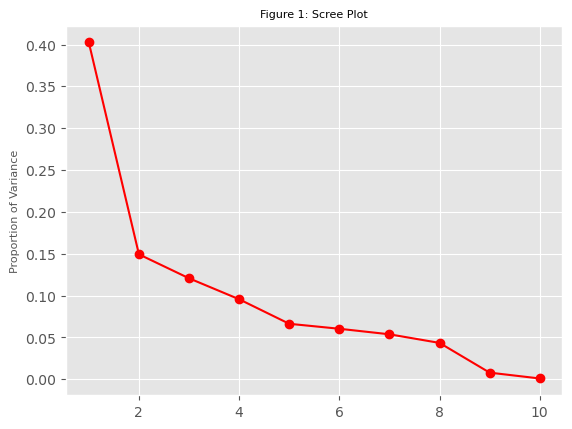

In [11]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [12]:
pca = PCA(n_components=2)
PC = pca.fit_transform(Diabetes_scaled)

In [13]:
pca_diabetes = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
 
pca_diabetes.head(6)

,PC1,PC2
0,0.587208,-1.946828
1,-2.831612,1.372085
2,0.272148,-1.634898
3,0.049310,0.382253
4,-0.756451,0.811968
5,-3.966355,-0.381059
